In [1]:
# Load CMIP6 tas data.

import matplotlib.pyplot as plt

import iris
import iris.plot as iplt
import iris.quickplot as qplt

import glob
import os
import glob
from os import listdir

import re
import numpy as np

import datetime
from iris.time import PartialDateTime

iris.FUTURE.cell_datetime_objects = True
    
def listdir_nohidden(path):
    return glob.glob(os.path.join(path, '*'))

def load_n_squeeze(fn):
    return iris.util.squeeze(iris.load_cube(fn))

awdir = "/data/users/hadaw/cmip6/areaavg/tas/"

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/__init__.py:237: IrisDeprecation: setting the 'Future' property 'cell_datetime_objects' is deprecated and will be removed in a future release. Please remove code that sets this property.
  warn_deprecated(msg.format(name))


In [3]:
# Historical tas data
# NOTE the data in some models is repeated, or very long, or doesn't have a time coordinate.
# There are some hacks to get around that, for example, just taking the final 165 years of the
# data, and assuming that's 1850:2014

# This finds a list of UKESM hsitorical runs and pathlist
historical_r1i1p1_pathlist = glob.glob(awdir+'*historical*r1i1p1*')

# Just the filnames
historical_r1i1p1_filenames = [os.path.basename(x) for x in glob.glob(awdir+'*historical*r1i1p1*')]
#print(historical_r1i1p1_filenames) 

startyear = 1850
endyear = 2015
years = range(startyear,endyear)
dl = len(years)

outfile_data = 'data/cmip6_tas_historical_r1i1p1.txt'
outfile_models = 'data/cmip6_models_historical_r1i1p1.txt'
# set up year headers for the file
out_ts = years

for i in historical_r1i1p1_pathlist:
    print(i)
    
    # Empty container with NaNs for the data
    dat = np.empty(dl)
    dat[:] = -999
    
    m = re.search('Amon_(.+?)_historical', i)
    if m:
        modelname = m.group(1)
        print(modelname)
    
    cube = load_n_squeeze(i)
    #time = cube.coord('time')
    #print(time)
    
    # take the last 165 years of the data, to allow for errors in the previous processing
    dat[0:dl] = cube.data[-dl:]
    
    out_ts = np.vstack((out_ts, dat))
  
np.savetxt(outfile_data, out_ts)
np.savetxt(outfile_models, historical_r1i1p1_pathlist, fmt = '%s')

/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_E3SM-1-1_historical_r1i1p1f1_gr_area_avg.nc
E3SM-1-1


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_HadGEM3-GC31-MM_historical_r1i1p1f3_gn_area_avg.nc
HadGEM3-GC31-MM


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_NorCPM1_historical_r1i1p1f1_gn_area_avg.nc
NorCPM1


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_CESM2-WACCM-FV2_historical_r1i1p1f1_gn_area_avg.nc
CESM2-WACCM-FV2


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_NorESM2-MM_historical_r1i1p1f1_gn_area_avg.nc
NorESM2-MM


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_INM-CM4-8_historical_r1i1p1f1_gr1_area_avg.nc
INM-CM4-8


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_MIROC-ES2L_historical_r1i1p1f2_gn_area_avg.nc
MIROC-ES2L


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_GISS-E2-1-G_historical_r1i1p1f1_gn_area_avg.nc
GISS-E2-1-G
/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_CESM2-FV2_historical_r1i1p1f1_gn_area_avg.nc
CESM2-FV2


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_MRI-ESM2-0_historical_r1i1p1f1_gn_area_avg.nc
MRI-ESM2-0


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_NorESM2-LM_historical_r1i1p1f1_gn_area_avg.nc
NorESM2-LM


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_area_avg.nc
MPI-ESM1-2-HR


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_EC-Earth3-Veg_historical_r1i1p1f1_gr_area_avg.nc
EC-Earth3-Veg


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_CESM2-WACCM_historical_r1i1p1f1_gn_area_avg.nc
CESM2-WACCM


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_GISS-E2-1-H_historical_r1i1p1f2_gn_area_avg.nc
GISS-E2-1-H
/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_GFDL-CM4_historical_r1i1p1f1_gr1_area_avg.nc
GFDL-CM4


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_CAMS-CSM1-0_historical_r1i1p1f2_gn_area_avg.nc
CAMS-CSM1-0
/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_CNRM-CM6-1_historical_r1i1p1f2_gr_area_avg.nc
CNRM-CM6-1


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_CAMS-CSM1-0_historical_r1i1p1f1_gn_area_avg.nc
CAMS-CSM1-0
/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_CNRM-ESM2-1_historical_r1i1p1f2_gr_area_avg.nc
CNRM-ESM2-1


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_GFDL-ESM4_historical_r1i1p1f1_gr1_area_avg.nc
GFDL-ESM4


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_INM-CM5-0_historical_r1i1p1f1_gr1_area_avg.nc
INM-CM5-0


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_area_avg.nc
MPI-ESM1-2-LR


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_MPI-ESM-1-2-HAM_historical_r1i1p1f1_gn_area_avg.nc
MPI-ESM-1-2-HAM


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_MIROC6_historical_r1i1p1f1_gn_area_avg.nc
MIROC6


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_area_avg.nc
ACCESS-CM2


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_TaiESM1_historical_r1i1p1f1_gn_area_avg.nc
TaiESM1


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_area_avg.nc
UKESM1-0-LL


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_BCC-CSM2-MR_historical_r1i1p1f1_gn_area_avg.nc
BCC-CSM2-MR
/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_MCM-UA-1-0_historical_r1i1p1f2_gn_area_avg.nc
MCM-UA-1-0
/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_E3SM-1-0_historical_r1i1p1f1_gr_area_avg.nc
E3SM-1-0


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2076: UserWarning: Failed to create 'time' dimension coordinate: The points array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  error=e_msg))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_area_avg.nc
HadGEM3-GC31-LL


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_CESM2_historical_r1i1p1f1_gn_area_avg.nc
CESM2


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_CanESM5_historical_r1i1p1f1_gn_area_avg.nc
CanESM5


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2076: UserWarning: Failed to create 'time' dimension coordinate: The points array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  error=e_msg))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_GISS-E2-1-G_historical_r1i1p1f2_gn_area_avg.nc
GISS-E2-1-G
/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_SAM0-UNICON_historical_r1i1p1f1_gn_area_avg.nc
SAM0-UNICON


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_CNRM-CM6-1-HR_historical_r1i1p1f2_gr_area_avg.nc
CNRM-CM6-1-HR


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_area_avg.nc
IPSL-CM6A-LR


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_GISS-E2-1-H_historical_r1i1p1f1_gn_area_avg.nc
GISS-E2-1-H
/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_GISS-E2-1-G-CC_historical_r1i1p1f1_gn_area_avg.nc
GISS-E2-1-G-CC
/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_MCM-UA-1-0_historical_r1i1p1f1_gn_area_avg.nc
MCM-UA-1-0
/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_area_avg.nc
ACCESS-ESM1-5


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_BCC-ESM1_historical_r1i1p1f1_gn_area_avg.nc
BCC-ESM1


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


[[1850.         1851.         1852.         ... 2012.
  2013.         2014.        ]
 [ 286.69934082  286.92657471  287.10394287 ...  287.74389648
   287.72497559  287.63238525]
 [ 287.11038208  287.17175293  287.06466675 ...  288.14916992
   288.00354004  287.95825195]
 ...
 [ 286.63018799  286.60049438  286.6572876  ...  287.82373047
   287.74624634  287.77893066]
 [ 287.78448486  287.66375732  287.60140991 ...  288.61721802
   288.72149658  288.70687866]
 [ 288.08666992  288.02398682  287.99914551 ...  288.59436035
   288.62072754  288.74185181]]


In [66]:
#data = [['nameservers','panel'], ['nameservers','panel']]

#with open('tmp_file.txt', 'w') as f:
#    csv.writer(f, delimiter=' ').writerows(data)
    
data = [['nameservers','panel'], ['nameservers','panel']]

with open("output.txt", "w") as txt_file:
    for line in data:
        txt_file.write("hello"+" ".join(line) + "\n") # works with any number of elements
        

nlines = range(len(outfile_models))

print(nlines)


with open("output.txt", "w") as txt_file:
    
    for i in nlines:
        print(i)
        print(historical_r1i1p1_pathlist[i])
        txt_file.write('year' + str(years))
        txt_file.write(historical_r1i1p1_pathlist[i]+ "test" + "\n") # works with any number of elements
    

range(0, 15)
0
/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_E3SM-1-1_historical_r1i1p1f1_gr_area_avg.nc
1
/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_HadGEM3-GC31-MM_historical_r1i1p1f3_gn_area_avg.nc
2
/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_NorCPM1_historical_r1i1p1f1_gn_area_avg.nc
3
/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_CESM2-WACCM-FV2_historical_r1i1p1f1_gn_area_avg.nc
4
/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_NorESM2-MM_historical_r1i1p1f1_gn_area_avg.nc
5
/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_INM-CM4-8_historical_r1i1p1f1_gr1_area_avg.nc
6
/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_MIROC-ES2L_historical_r1i1p1f2_gn_area_avg.nc
7
/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_GISS-E2-1-G_historical_r1i1p1f1_gn_area_avg.nc
8
/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_CESM2-FV2_historical_r1i1p1f1_gn_area_avg.nc
9
/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_MRI-ESM2-0_historical_r1i1p1f1_gn_area_avg.nc
10
/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_NorE

In [ ]:

with open("test_output.txt", "w") as txt_file:
    for line in data:
        txt_file.write("hello"+" ".join(line) + "\n") # works with any number of elements
        
        
        

In [43]:
print(len(outfile_models
         ))

15


In [24]:
    
    #time = cube.coord('time')
    #print(time)
    
    #time_units = cube.coord('time').units
    #lwr = time_units.date2num(datetime.datetime(startyear, 1, 1))
    #print(lwr)
    #upr = time_units.date2num(datetime.datetime(endyear, 1, 1))
    #print(upr)
    #time_constraint = iris.Constraint(time = lambda time: time >= lwr and time <= upr)
    #print(time_constraint)
    #cube_timeconst = cube.extract(time_constraint)
    
    #pdt1 = PartialDateTime(year=1850, month=1, day=1)
    #pdt2 = PartialDateTime(year=2015, month=1, day=1)
    #print(pdt2)
    #daterange = iris.Constraint(time=lambda cell: pdt1 <= cell.point < pdt2)
    #time_constraint = iris.Constraint(time = lambda time: time >= pdt1 and time <= pdt2)
    
    
    #date_range=iris.Constraint(time=lambda cell: 1850 <= cell.point.year <= 2015)
    #cube_timeconst = cube.extract(date_range)
    #print(cube_timeconst)
    #dlc = len(cube_timeconst.data)
    #print(dlc)
    
    
    #print(daterange)
    #print(daterange.coord('time'))
    #constraint = iris._constraints.as_constraint(daterange)
    #print(daterange)

    #cube_timeconstconst = cube.extract(constraint)

        
        
# process the data, years in columns and models in rows? 





#print(within_st_swithuns_07.coord('time'))

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/__init__.py:237: IrisDeprecation: setting the 'Future' property 'cell_datetime_objects' is deprecated and will be removed in a future release. Please remove code that sets this property.
  warn_deprecated(msg.format(name))
/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


range(1850, 2015)
165
/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_E3SM-1-1_historical_r1i1p1f1_gr_area_avg.nc
E3SM-1-1
DimCoord([1850-07-01 06:00:00, 1851-07-01 06:00:00, 1852-07-01 06:00:00,
       1853-07-01 06:00:00, 1854-07-01 06:00:00, 1855-07-01 06:00:00,
       1856-07-01 06:00:00, 1857-07-01 06:00:00, 1858-07-01 06:00:00,
       1859-07-01 06:00:00, 1860-07-01 06:00:00, 1861-07-01 06:00:00,
       1862-07-01 06:00:00, 1863-07-01 06:00:00, 1864-07-01 06:00:00,
       1865-07-01 06:00:00, 1866-07-01 06:00:00, 1867-07-01 06:00:00,
       1868-07-01 06:00:00, 1869-07-01 06:00:00, 1870-07-01 06:00:00,
       1871-07-01 06:00:00, 1872-07-01 06:00:00, 1873-07-01 06:00:00,
       1874-07-01 06:00:00, 1875-07-01 06:00:00, 1876-07-01 06:00:00,
       1877-07-01 06:00:00, 1878-07-01 06:00:00, 1879-07-01 06:00:00,
       1880-07-01 06:00:00, 1881-07-01 06:00:00, 1882-07-01 06:00:00,
       1883-07-01 06:00:00, 1884-07-01 06:00:00, 1885-07-01 06:00:00,
       1886-07-01 06:00:00, 1887-07-0

/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_HadGEM3-GC31-MM_historical_r1i1p1f3_gn_area_avg.nc
HadGEM3-GC31-MM
DimCoord([1850-07-01 00:00:00, 1851-07-01 00:00:00, 1852-07-01 00:00:00,
       1853-07-01 00:00:00, 1854-07-01 00:00:00, 1855-07-01 00:00:00,
       1856-07-01 00:00:00, 1857-07-01 00:00:00, 1858-07-01 00:00:00,
       1859-07-01 00:00:00, 1860-07-01 00:00:00, 1861-07-01 00:00:00,
       1862-07-01 00:00:00, 1863-07-01 00:00:00, 1864-07-01 00:00:00,
       1865-07-01 00:00:00, 1866-07-01 00:00:00, 1867-07-01 00:00:00,
       1868-07-01 00:00:00, 1869-07-01 00:00:00, 1870-07-01 00:00:00,
       1871-07-01 00:00:00, 1872-07-01 00:00:00, 1873-07-01 00:00:00,
       1874-07-01 00:00:00, 1875-07-01 00:00:00, 1876-07-01 00:00:00,
       1877-07-01 00:00:00, 1878-07-01 00:00:00, 1879-07-01 00:00:00,
       1880-07-01 00:00:00, 1881-07-01 00:00:00, 1882-07-01 00:00:00,
       1883-07-01 00:00:00, 1884-07-01 00:00:00, 1885-07-01 00:00:00,
       1886-07-01 00:00:00, 1887-07-01 00:00:

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_NorCPM1_historical_r1i1p1f1_gn_area_avg.nc
NorCPM1
DimCoord([1850-07-01 06:00:00, 1851-07-01 06:00:00, 1852-07-01 06:00:00,
       1853-07-01 06:00:00, 1854-07-01 06:00:00, 1855-07-01 06:00:00,
       1856-07-01 06:00:00, 1857-07-01 06:00:00, 1858-07-01 06:00:00,
       1859-07-01 06:00:00, 1860-07-01 06:00:00, 1861-07-01 06:00:00,
       1862-07-01 06:00:00, 1863-07-01 06:00:00, 1864-07-01 06:00:00,
       1865-07-01 06:00:00, 1866-07-01 06:00:00, 1867-07-01 06:00:00,
       1868-07-01 06:00:00, 1869-07-01 06:00:00, 1870-07-01 06:00:00,
       1871-07-01 06:00:00, 1872-07-01 06:00:00, 1873-07-01 06:00:00,
       1874-07-01 06:00:00, 1875-07-01 06:00:00, 1876-07-01 06:00:00,
       1877-07-01 06:00:00, 1878-07-01 06:00:00, 1879-07-01 06:00:00,
       1880-07-01 06:00:00, 1881-07-01 06:00:00, 1882-07-01 06:00:00,
       1883-07-01 06:00:00, 1884-07-01 06:00:00, 1885-07-01 06:00:00,
       1886-07-01 06:00:00, 1887-07-01 06:00:00, 1888-07-01 0

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_CESM2-WACCM-FV2_historical_r1i1p1f1_gn_area_avg.nc
CESM2-WACCM-FV2
DimCoord([1850-06-30 06:00:00, 1851-06-30 06:00:00, 1852-06-30 06:00:00,
       1853-06-30 06:00:00, 1854-06-30 06:00:00, 1855-06-30 06:00:00,
       1856-06-30 06:00:00, 1857-06-30 06:00:00, 1858-06-30 06:00:00,
       1859-06-30 06:00:00, 1860-06-30 06:00:00, 1861-06-30 06:00:00,
       1862-06-30 06:00:00, 1863-06-30 06:00:00, 1864-06-30 06:00:00,
       1865-06-30 06:00:00, 1866-06-30 06:00:00, 1867-06-30 06:00:00,
       1868-06-30 06:00:00, 1869-06-30 06:00:00, 1870-06-30 06:00:00,
       1871-06-30 06:00:00, 1872-06-30 06:00:00, 1873-06-30 06:00:00,
       1874-06-30 06:00:00, 1875-06-30 06:00:00, 1876-06-30 06:00:00,
       1877-06-30 06:00:00, 1878-06-30 06:00:00, 1879-06-30 06:00:00,
       1880-06-30 06:00:00, 1881-06-30 06:00:00, 1882-06-30 06:00:00,
       1883-06-30 06:00:00, 1884-06-30 06:00:00, 1885-06-30 06:00:00,
       1886-06-30 06:00:00, 1887-06-30 06:00:

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_NorESM2-MM_historical_r1i1p1f1_gn_area_avg.nc
NorESM2-MM
DimCoord([1850-07-01 06:00:00, 1851-07-01 06:00:00, 1852-07-01 06:00:00,
       1853-07-01 06:00:00, 1854-07-01 06:00:00, 1855-07-01 06:00:00,
       1856-07-01 06:00:00, 1857-07-01 06:00:00, 1858-07-01 06:00:00,
       1859-07-01 06:00:00, 1860-07-01 06:00:00, 1861-07-01 06:00:00,
       1862-07-01 06:00:00, 1863-07-01 06:00:00, 1864-07-01 06:00:00,
       1865-07-01 06:00:00, 1866-07-01 06:00:00, 1867-07-01 06:00:00,
       1868-07-01 06:00:00, 1869-07-01 06:00:00, 1870-07-01 06:00:00,
       1871-07-01 06:00:00, 1872-07-01 06:00:00, 1873-07-01 06:00:00,
       1874-07-01 06:00:00, 1875-07-01 06:00:00, 1876-07-01 06:00:00,
       1877-07-01 06:00:00, 1878-07-01 06:00:00, 1879-07-01 06:00:00,
       1880-07-01 06:00:00, 1881-07-01 06:00:00, 1882-07-01 06:00:00,
       1883-07-01 06:00:00, 1884-07-01 06:00:00, 1885-07-01 06:00:00,
       1886-07-01 06:00:00, 1887-07-01 06:00:00, 1888-0

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_INM-CM4-8_historical_r1i1p1f1_gr1_area_avg.nc
INM-CM4-8
DimCoord([1850-07-01 06:00:00, 1851-07-01 06:00:00, 1852-07-01 06:00:00,
       1853-07-01 06:00:00, 1854-07-01 06:00:00, 1855-07-01 06:00:00,
       1856-07-01 06:00:00, 1857-07-01 06:00:00, 1858-07-01 06:00:00,
       1859-07-01 06:00:00, 1860-07-01 06:00:00, 1861-07-01 06:00:00,
       1862-07-01 06:00:00, 1863-07-01 06:00:00, 1864-07-01 06:00:00,
       1865-07-01 06:00:00, 1866-07-01 06:00:00, 1867-07-01 06:00:00,
       1868-07-01 06:00:00, 1869-07-01 06:00:00, 1870-07-01 06:00:00,
       1871-07-01 06:00:00, 1872-07-01 06:00:00, 1873-07-01 06:00:00,
       1874-07-01 06:00:00, 1875-07-01 06:00:00, 1876-07-01 06:00:00,
       1877-07-01 06:00:00, 1878-07-01 06:00:00, 1879-07-01 06:00:00,
       1880-07-01 06:00:00, 1881-07-01 06:00:00, 1882-07-01 06:00:00,
       1883-07-01 06:00:00, 1884-07-01 06:00:00, 1885-07-01 06:00:00,
       1886-07-01 06:00:00, 1887-07-01 06:00:00, 1888-07

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_MIROC-ES2L_historical_r1i1p1f2_gn_area_avg.nc
MIROC-ES2L
DimCoord([1850-07-01 06:00:00, 1851-07-01 06:00:00, 1852-07-01 06:00:00,
       1853-07-01 06:00:00, 1854-07-01 06:00:00, 1855-07-01 06:00:00,
       1856-07-01 06:00:00, 1857-07-01 06:00:00, 1858-07-01 06:00:00,
       1859-07-01 06:00:00, 1860-07-01 06:00:00, 1861-07-01 06:00:00,
       1862-07-01 06:00:00, 1863-07-01 06:00:00, 1864-07-01 06:00:00,
       1865-07-01 06:00:00, 1866-07-01 06:00:00, 1867-07-01 06:00:00,
       1868-07-01 06:00:00, 1869-07-01 06:00:00, 1870-07-01 06:00:00,
       1871-07-01 06:00:00, 1872-07-01 06:00:00, 1873-07-01 06:00:00,
       1874-07-01 06:00:00, 1875-07-01 06:00:00, 1876-07-01 06:00:00,
       1877-07-01 06:00:00, 1878-07-01 06:00:00, 1879-07-01 06:00:00,
       1880-07-01 06:00:00, 1881-07-01 06:00:00, 1882-07-01 06:00:00,
       1883-07-01 06:00:00, 1884-07-01 06:00:00, 1885-07-01 06:00:00,
       1886-07-01 06:00:00, 1887-07-01 06:00:00, 1888-0

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_GISS-E2-1-G_historical_r1i1p1f1_gn_area_avg.nc
GISS-E2-1-G
DimCoord([1850-07-01 06:00:00, 1851-07-01 06:00:00, 1852-07-01 06:00:00,
       1853-07-01 06:00:00, 1854-07-01 06:00:00, 1855-07-01 06:00:00,
       1856-07-01 06:00:00, 1857-07-01 06:00:00, 1858-07-01 06:00:00,
       1859-07-01 06:00:00, 1860-07-01 06:00:00, 1861-07-01 06:00:00,
       1862-07-01 06:00:00, 1863-07-01 06:00:00, 1864-07-01 06:00:00,
       1865-07-01 06:00:00, 1866-07-01 06:00:00, 1867-07-01 06:00:00,
       1868-07-01 06:00:00, 1869-07-01 06:00:00, 1870-07-01 06:00:00,
       1871-07-01 06:00:00, 1872-07-01 06:00:00, 1873-07-01 06:00:00,
       1874-07-01 06:00:00, 1875-07-01 06:00:00, 1876-07-01 06:00:00,
       1877-07-01 06:00:00, 1878-07-01 06:00:00, 1879-07-01 06:00:00,
       1880-07-01 06:00:00, 1881-07-01 06:00:00, 1882-07-01 06:00:00,
       1883-07-01 06:00:00, 1884-07-01 06:00:00, 1885-07-01 06:00:00,
       1886-07-01 06:00:00, 1887-07-01 06:00:00, 1888

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_MRI-ESM2-0_historical_r1i1p1f1_gn_area_avg.nc
MRI-ESM2-0
DimCoord([1850-07-01 06:00:00, 1851-07-01 06:00:00, 1852-07-01 06:00:00,
       1853-07-01 06:00:00, 1854-07-01 06:00:00, 1855-07-01 06:00:00,
       1856-07-01 06:00:00, 1857-07-01 06:00:00, 1858-07-01 06:00:00,
       1859-07-01 06:00:00, 1860-07-01 06:00:00, 1861-07-01 06:00:00,
       1862-07-01 06:00:00, 1863-07-01 06:00:00, 1864-07-01 06:00:00,
       1865-07-01 06:00:00, 1866-07-01 06:00:00, 1867-07-01 06:00:00,
       1868-07-01 06:00:00, 1869-07-01 06:00:00, 1870-07-01 06:00:00,
       1871-07-01 06:00:00, 1872-07-01 06:00:00, 1873-07-01 06:00:00,
       1874-07-01 06:00:00, 1875-07-01 06:00:00, 1876-07-01 06:00:00,
       1877-07-01 06:00:00, 1878-07-01 06:00:00, 1879-07-01 06:00:00,
       1880-07-01 06:00:00, 1881-07-01 06:00:00, 1882-07-01 06:00:00,
       1883-07-01 06:00:00, 1884-07-01 06:00:00, 1885-07-01 06:00:00,
       1886-07-01 06:00:00, 1887-07-01 06:00:00, 1888-0

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_NorESM2-LM_historical_r1i1p1f1_gn_area_avg.nc
NorESM2-LM
DimCoord([1850-07-01 06:00:00, 1851-07-01 06:00:00, 1852-07-01 06:00:00,
       1853-07-01 06:00:00, 1854-07-01 06:00:00, 1855-07-01 06:00:00,
       1856-07-01 06:00:00, 1857-07-01 06:00:00, 1858-07-01 06:00:00,
       1859-07-01 06:00:00, 1860-07-01 06:00:00, 1861-07-01 06:00:00,
       1862-07-01 06:00:00, 1863-07-01 06:00:00, 1864-07-01 06:00:00,
       1865-07-01 06:00:00, 1866-07-01 06:00:00, 1867-07-01 06:00:00,
       1868-07-01 06:00:00, 1869-07-01 06:00:00, 1870-07-01 06:00:00,
       1871-07-01 06:00:00, 1872-07-01 06:00:00, 1873-07-01 06:00:00,
       1874-07-01 06:00:00, 1875-07-01 06:00:00, 1876-07-01 06:00:00,
       1877-07-01 06:00:00, 1878-07-01 06:00:00, 1879-07-01 06:00:00,
       1880-07-01 06:00:00, 1881-07-01 06:00:00, 1882-07-01 06:00:00,
       1883-07-01 06:00:00, 1884-07-01 06:00:00, 1885-07-01 06:00:00,
       1886-07-01 06:00:00, 1887-07-01 06:00:00, 1888-0

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_area_avg.nc
MPI-ESM1-2-HR
DimCoord([1850-07-01 06:00:00, 1851-07-01 06:00:00, 1852-07-01 06:00:00,
       1853-07-01 06:00:00, 1854-07-01 06:00:00, 1855-07-01 06:00:00,
       1856-07-01 06:00:00, 1857-07-01 06:00:00, 1858-07-01 06:00:00,
       1859-07-01 06:00:00, 1860-07-01 06:00:00, 1861-07-01 06:00:00,
       1862-07-01 06:00:00, 1863-07-01 06:00:00, 1864-07-01 06:00:00,
       1865-07-01 06:00:00, 1866-07-01 06:00:00, 1867-07-01 06:00:00,
       1868-07-01 06:00:00, 1869-07-01 06:00:00, 1870-07-01 06:00:00,
       1871-07-01 06:00:00, 1872-07-01 06:00:00, 1873-07-01 06:00:00,
       1874-07-01 06:00:00, 1875-07-01 06:00:00, 1876-07-01 06:00:00,
       1877-07-01 06:00:00, 1878-07-01 06:00:00, 1879-07-01 06:00:00,
       1880-07-01 06:00:00, 1881-07-01 06:00:00, 1882-07-01 06:00:00,
       1883-07-01 06:00:00, 1884-07-01 06:00:00, 1885-07-01 06:00:00,
       1886-07-01 06:00:00, 1887-07-01 06:00:00, 

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_EC-Earth3-Veg_historical_r1i1p1f1_gr_area_avg.nc
EC-Earth3-Veg
DimCoord([1850-07-01 06:00:00, 1851-07-01 06:00:00, 1852-07-01 06:00:00,
       1853-07-01 06:00:00, 1854-07-01 06:00:00, 1855-07-01 06:00:00,
       1856-07-01 06:00:00, 1857-07-01 06:00:00, 1858-07-01 06:00:00,
       1859-07-01 06:00:00, 1860-07-01 06:00:00, 1861-07-01 06:00:00,
       1862-07-01 06:00:00, 1863-07-01 06:00:00, 1864-07-01 06:00:00,
       1865-07-01 06:00:00, 1866-07-01 06:00:00, 1867-07-01 06:00:00,
       1868-07-01 06:00:00, 1869-07-01 06:00:00, 1870-07-01 06:00:00,
       1871-07-01 06:00:00, 1872-07-01 06:00:00, 1873-07-01 06:00:00,
       1874-07-01 06:00:00, 1875-07-01 06:00:00, 1876-07-01 06:00:00,
       1877-07-01 06:00:00, 1878-07-01 06:00:00, 1879-07-01 06:00:00,
       1880-07-01 06:00:00, 1881-07-01 06:00:00, 1882-07-01 06:00:00,
       1883-07-01 06:00:00, 1884-07-01 06:00:00, 1885-07-01 06:00:00,
       1886-07-01 06:00:00, 1887-07-01 06:00:00, 

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_CESM2-WACCM_historical_r1i1p1f1_gn_area_avg.nc
CESM2-WACCM
DimCoord([1850-06-30 06:00:00, 1851-06-30 06:00:00, 1852-06-30 06:00:00,
       1853-06-30 06:00:00, 1854-06-30 06:00:00, 1855-06-30 06:00:00,
       1856-06-30 06:00:00, 1857-06-30 06:00:00, 1858-06-30 06:00:00,
       1859-06-30 06:00:00, 1860-06-30 06:00:00, 1861-06-30 06:00:00,
       1862-06-30 06:00:00, 1863-06-30 06:00:00, 1864-06-30 06:00:00,
       1865-06-30 06:00:00, 1866-06-30 06:00:00, 1867-06-30 06:00:00,
       1868-06-30 06:00:00, 1869-06-30 06:00:00, 1870-06-30 06:00:00,
       1871-06-30 06:00:00, 1872-06-30 06:00:00, 1873-06-30 06:00:00,
       1874-06-30 06:00:00, 1875-06-30 06:00:00, 1876-06-30 06:00:00,
       1877-06-30 06:00:00, 1878-06-30 06:00:00, 1879-06-30 06:00:00,
       1880-06-30 06:00:00, 1881-06-30 06:00:00, 1882-06-30 06:00:00,
       1883-06-30 06:00:00, 1884-06-30 06:00:00, 1885-06-30 06:00:00,
       1886-06-30 06:00:00, 1887-06-30 06:00:00, 1888

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_GISS-E2-1-H_historical_r1i1p1f2_gn_area_avg.nc
GISS-E2-1-H
DimCoord([1850-07-01 06:00:00, 1851-07-01 06:00:00, 1852-07-01 06:00:00,
       1853-07-01 06:00:00, 1854-07-01 06:00:00, 1855-07-01 06:00:00,
       1856-07-01 06:00:00, 1857-07-01 06:00:00, 1858-07-01 06:00:00,
       1859-07-01 06:00:00, 1860-07-01 06:00:00, 1861-07-01 06:00:00,
       1862-07-01 06:00:00, 1863-07-01 06:00:00, 1864-07-01 06:00:00,
       1865-07-01 06:00:00, 1866-07-01 06:00:00, 1867-07-01 06:00:00,
       1868-07-01 06:00:00, 1869-07-01 06:00:00, 1870-07-01 06:00:00,
       1871-07-01 06:00:00, 1872-07-01 06:00:00, 1873-07-01 06:00:00,
       1874-07-01 06:00:00, 1875-07-01 06:00:00, 1876-07-01 06:00:00,
       1877-07-01 06:00:00, 1878-07-01 06:00:00, 1879-07-01 06:00:00,
       1880-07-01 06:00:00, 1881-07-01 06:00:00, 1882-07-01 06:00:00,
       1883-07-01 06:00:00, 1884-07-01 06:00:00, 1885-07-01 06:00:00,
       1886-07-01 06:00:00, 1887-07-01 06:00:00, 1888

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_CAMS-CSM1-0_historical_r1i1p1f2_gn_area_avg.nc
CAMS-CSM1-0
DimCoord([1850-07-01 06:00:00, 1851-07-01 06:00:00, 1852-07-01 06:00:00,
       1853-07-01 06:00:00, 1854-07-01 06:00:00, 1855-07-01 06:00:00,
       1856-07-01 06:00:00, 1857-07-01 06:00:00, 1858-07-01 06:00:00,
       1859-07-01 06:00:00, 1860-07-01 06:00:00, 1861-07-01 06:00:00,
       1862-07-01 06:00:00, 1863-07-01 06:00:00, 1864-07-01 06:00:00,
       1865-07-01 06:00:00, 1866-07-01 06:00:00, 1867-07-01 06:00:00,
       1868-07-01 06:00:00, 1869-07-01 06:00:00, 1870-07-01 06:00:00,
       1871-07-01 06:00:00, 1872-07-01 06:00:00, 1873-07-01 06:00:00,
       1874-07-01 06:00:00, 1875-07-01 06:00:00, 1876-07-01 06:00:00,
       1877-07-01 06:00:00, 1878-07-01 06:00:00, 1879-07-01 06:00:00,
       1880-07-01 06:00:00, 1881-07-01 06:00:00, 1882-07-01 06:00:00,
       1883-07-01 06:00:00, 1884-07-01 06:00:00, 1885-07-01 06:00:00,
       1886-07-01 06:00:00, 1887-07-01 06:00:00, 1888

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_CAMS-CSM1-0_historical_r1i1p1f1_gn_area_avg.nc
CAMS-CSM1-0
DimCoord([1850-07-01 06:00:00, 1851-07-01 06:00:00, 1852-07-01 06:00:00,
       1853-07-01 06:00:00, 1854-07-01 06:00:00, 1855-07-01 06:00:00,
       1856-07-01 06:00:00, 1857-07-01 06:00:00, 1858-07-01 06:00:00,
       1859-07-01 06:00:00, 1860-07-01 06:00:00, 1861-07-01 06:00:00,
       1862-07-01 06:00:00, 1863-07-01 06:00:00, 1864-07-01 06:00:00,
       1865-07-01 06:00:00, 1866-07-01 06:00:00, 1867-07-01 06:00:00,
       1868-07-01 06:00:00, 1869-07-01 06:00:00, 1870-07-01 06:00:00,
       1871-07-01 06:00:00, 1872-07-01 06:00:00, 1873-07-01 06:00:00,
       1874-07-01 06:00:00, 1875-07-01 06:00:00, 1876-07-01 06:00:00,
       1877-07-01 06:00:00, 1878-07-01 06:00:00, 1879-07-01 06:00:00,
       1880-07-01 06:00:00, 1881-07-01 06:00:00, 1882-07-01 06:00:00,
       1883-07-01 06:00:00, 1884-07-01 06:00:00, 1885-07-01 06:00:00,
       1886-07-01 06:00:00, 1887-07-01 06:00:00, 1888

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_GFDL-ESM4_historical_r1i1p1f1_gr1_area_avg.nc
GFDL-ESM4
DimCoord([1850-07-01 06:00:00, 1851-07-01 06:00:00, 1852-07-01 06:00:00,
       1853-07-01 06:00:00, 1854-07-01 06:00:00, 1855-07-01 06:00:00,
       1856-07-01 06:00:00, 1857-07-01 06:00:00, 1858-07-01 06:00:00,
       1859-07-01 06:00:00, 1860-07-01 06:00:00, 1861-07-01 06:00:00,
       1862-07-01 06:00:00, 1863-07-01 06:00:00, 1864-07-01 06:00:00,
       1865-07-01 06:00:00, 1866-07-01 06:00:00, 1867-07-01 06:00:00,
       1868-07-01 06:00:00, 1869-07-01 06:00:00, 1870-07-01 06:00:00,
       1871-07-01 06:00:00, 1872-07-01 06:00:00, 1873-07-01 06:00:00,
       1874-07-01 06:00:00, 1875-07-01 06:00:00, 1876-07-01 06:00:00,
       1877-07-01 06:00:00, 1878-07-01 06:00:00, 1879-07-01 06:00:00,
       1880-07-01 06:00:00, 1881-07-01 06:00:00, 1882-07-01 06:00:00,
       1883-07-01 06:00:00, 1884-07-01 06:00:00, 1885-07-01 06:00:00,
       1886-07-01 06:00:00, 1887-07-01 06:00:00, 1888-07

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_INM-CM5-0_historical_r1i1p1f1_gr1_area_avg.nc
INM-CM5-0
DimCoord([1850-07-01 06:00:00, 1851-07-01 06:00:00, 1852-07-01 06:00:00,
       1853-07-01 06:00:00, 1854-07-01 06:00:00, 1855-07-01 06:00:00,
       1856-07-01 06:00:00, 1857-07-01 06:00:00, 1858-07-01 06:00:00,
       1859-07-01 06:00:00, 1860-07-01 06:00:00, 1861-07-01 06:00:00,
       1862-07-01 06:00:00, 1863-07-01 06:00:00, 1864-07-01 06:00:00,
       1865-07-01 06:00:00, 1866-07-01 06:00:00, 1867-07-01 06:00:00,
       1868-07-01 06:00:00, 1869-07-01 06:00:00, 1870-07-01 06:00:00,
       1871-07-01 06:00:00, 1872-07-01 06:00:00, 1873-07-01 06:00:00,
       1874-07-01 06:00:00, 1875-07-01 06:00:00, 1876-07-01 06:00:00,
       1877-07-01 06:00:00, 1878-07-01 06:00:00, 1879-07-01 06:00:00,
       1880-07-01 06:00:00, 1881-07-01 06:00:00, 1882-07-01 06:00:00,
       1883-07-01 06:00:00, 1884-07-01 06:00:00, 1885-07-01 06:00:00,
       1886-07-01 06:00:00, 1887-07-01 06:00:00, 1888-07

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_area_avg.nc
MPI-ESM1-2-LR
DimCoord([1850-07-01 06:00:00, 1851-07-01 06:00:00, 1852-07-01 06:00:00,
       1853-07-01 06:00:00, 1854-07-01 06:00:00, 1855-07-01 06:00:00,
       1856-07-01 06:00:00, 1857-07-01 06:00:00, 1858-07-01 06:00:00,
       1859-07-01 06:00:00, 1860-07-01 06:00:00, 1861-07-01 06:00:00,
       1862-07-01 06:00:00, 1863-07-01 06:00:00, 1864-07-01 06:00:00,
       1865-07-01 06:00:00, 1866-07-01 06:00:00, 1867-07-01 06:00:00,
       1868-07-01 06:00:00, 1869-07-01 06:00:00, 1870-07-01 06:00:00,
       1871-07-01 06:00:00, 1872-07-01 06:00:00, 1873-07-01 06:00:00,
       1874-07-01 06:00:00, 1875-07-01 06:00:00, 1876-07-01 06:00:00,
       1877-07-01 06:00:00, 1878-07-01 06:00:00, 1879-07-01 06:00:00,
       1880-07-01 06:00:00, 1881-07-01 06:00:00, 1882-07-01 06:00:00,
       1883-07-01 06:00:00, 1884-07-01 06:00:00, 1885-07-01 06:00:00,
       1886-07-01 06:00:00, 1887-07-01 06:00:00, 

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_MPI-ESM-1-2-HAM_historical_r1i1p1f1_gn_area_avg.nc
MPI-ESM-1-2-HAM
DimCoord([1850-07-01 06:00:00, 1851-07-01 06:00:00, 1852-07-01 06:00:00,
       1853-07-01 06:00:00, 1854-07-01 06:00:00, 1855-07-01 06:00:00,
       1856-07-01 06:00:00, 1857-07-01 06:00:00, 1858-07-01 06:00:00,
       1859-07-01 06:00:00, 1860-07-01 06:00:00, 1861-07-01 06:00:00,
       1862-07-01 06:00:00, 1863-07-01 06:00:00, 1864-07-01 06:00:00,
       1865-07-01 06:00:00, 1866-07-01 06:00:00, 1867-07-01 06:00:00,
       1868-07-01 06:00:00, 1869-07-01 06:00:00, 1870-07-01 06:00:00,
       1871-07-01 06:00:00, 1872-07-01 06:00:00, 1873-07-01 06:00:00,
       1874-07-01 06:00:00, 1875-07-01 06:00:00, 1876-07-01 06:00:00,
       1877-07-01 06:00:00, 1878-07-01 06:00:00, 1879-07-01 06:00:00,
       1880-07-01 06:00:00, 1881-07-01 06:00:00, 1882-07-01 06:00:00,
       1883-07-01 06:00:00, 1884-07-01 06:00:00, 1885-07-01 06:00:00,
       1886-07-01 06:00:00, 1887-07-01 06:00:

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_MIROC6_historical_r1i1p1f1_gn_area_avg.nc
MIROC6
DimCoord([1850-07-01 06:00:00, 1851-07-01 06:00:00, 1852-07-01 06:00:00,
       1853-07-01 06:00:00, 1854-07-01 06:00:00, 1855-07-01 06:00:00,
       1856-07-01 06:00:00, 1857-07-01 06:00:00, 1858-07-01 06:00:00,
       1859-07-01 06:00:00, 1860-07-01 06:00:00, 1861-07-01 06:00:00,
       1862-07-01 06:00:00, 1863-07-01 06:00:00, 1864-07-01 06:00:00,
       1865-07-01 06:00:00, 1866-07-01 06:00:00, 1867-07-01 06:00:00,
       1868-07-01 06:00:00, 1869-07-01 06:00:00, 1870-07-01 06:00:00,
       1871-07-01 06:00:00, 1872-07-01 06:00:00, 1873-07-01 06:00:00,
       1874-07-01 06:00:00, 1875-07-01 06:00:00, 1876-07-01 06:00:00,
       1877-07-01 06:00:00, 1878-07-01 06:00:00, 1879-07-01 06:00:00,
       1880-07-01 06:00:00, 1881-07-01 06:00:00, 1882-07-01 06:00:00,
       1883-07-01 06:00:00, 1884-07-01 06:00:00, 1885-07-01 06:00:00,
       1886-07-01 06:00:00, 1887-07-01 06:00:00, 1888-07-01 06:

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_area_avg.nc
ACCESS-CM2
DimCoord([1850-07-01 06:00:00, 1851-07-01 06:00:00, 1852-07-01 06:00:00,
       1853-07-01 06:00:00, 1854-07-01 06:00:00, 1855-07-01 06:00:00,
       1856-07-01 06:00:00, 1857-07-01 06:00:00, 1858-07-01 06:00:00,
       1859-07-01 06:00:00, 1860-07-01 06:00:00, 1861-07-01 06:00:00,
       1862-07-01 06:00:00, 1863-07-01 06:00:00, 1864-07-01 06:00:00,
       1865-07-01 06:00:00, 1866-07-01 06:00:00, 1867-07-01 06:00:00,
       1868-07-01 06:00:00, 1869-07-01 06:00:00, 1870-07-01 06:00:00,
       1871-07-01 06:00:00, 1872-07-01 06:00:00, 1873-07-01 06:00:00,
       1874-07-01 06:00:00, 1875-07-01 06:00:00, 1876-07-01 06:00:00,
       1877-07-01 06:00:00, 1878-07-01 06:00:00, 1879-07-01 06:00:00,
       1880-07-01 06:00:00, 1881-07-01 06:00:00, 1882-07-01 06:00:00,
       1883-07-01 06:00:00, 1884-07-01 06:00:00, 1885-07-01 06:00:00,
       1886-07-01 06:00:00, 1887-07-01 06:00:00, 1888-0

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_TaiESM1_historical_r1i1p1f1_gn_area_avg.nc
TaiESM1
DimCoord([1850-07-01 06:00:00, 1851-07-01 06:00:00, 1852-07-01 06:00:00,
       1853-07-01 06:00:00, 1854-07-01 06:00:00, 1855-07-01 06:00:00,
       1856-07-01 06:00:00, 1857-07-01 06:00:00, 1858-07-01 06:00:00,
       1859-07-01 06:00:00, 1860-07-01 06:00:00, 1861-07-01 06:00:00,
       1862-07-01 06:00:00, 1863-07-01 06:00:00, 1864-07-01 06:00:00,
       1865-07-01 06:00:00, 1866-07-01 06:00:00, 1867-07-01 06:00:00,
       1868-07-01 06:00:00, 1869-07-01 06:00:00, 1870-07-01 06:00:00,
       1871-07-01 06:00:00, 1872-07-01 06:00:00, 1873-07-01 06:00:00,
       1874-07-01 06:00:00, 1875-07-01 06:00:00, 1876-07-01 06:00:00,
       1877-07-01 06:00:00, 1878-07-01 06:00:00, 1879-07-01 06:00:00,
       1880-07-01 06:00:00, 1881-07-01 06:00:00, 1882-07-01 06:00:00,
       1883-07-01 06:00:00, 1884-07-01 06:00:00, 1885-07-01 06:00:00,
       1886-07-01 06:00:00, 1887-07-01 06:00:00, 1888-07-01 0

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_area_avg.nc
UKESM1-0-LL
DimCoord([1850-07-01 00:00:00, 1851-07-01 00:00:00, 1852-07-01 00:00:00,
       1853-07-01 00:00:00, 1854-07-01 00:00:00, 1855-07-01 00:00:00,
       1856-07-01 00:00:00, 1857-07-01 00:00:00, 1858-07-01 00:00:00,
       1859-07-01 00:00:00, 1860-07-01 00:00:00, 1861-07-01 00:00:00,
       1862-07-01 00:00:00, 1863-07-01 00:00:00, 1864-07-01 00:00:00,
       1865-07-01 00:00:00, 1866-07-01 00:00:00, 1867-07-01 00:00:00,
       1868-07-01 00:00:00, 1869-07-01 00:00:00, 1870-07-01 00:00:00,
       1871-07-01 00:00:00, 1872-07-01 00:00:00, 1873-07-01 00:00:00,
       1874-07-01 00:00:00, 1875-07-01 00:00:00, 1876-07-01 00:00:00,
       1877-07-01 00:00:00, 1878-07-01 00:00:00, 1879-07-01 00:00:00,
       1880-07-01 00:00:00, 1881-07-01 00:00:00, 1882-07-01 00:00:00,
       1883-07-01 00:00:00, 1884-07-01 00:00:00, 1885-07-01 00:00:00,
       1886-07-01 00:00:00, 1887-07-01 00:00:00, 1888

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_BCC-CSM2-MR_historical_r1i1p1f1_gn_area_avg.nc
BCC-CSM2-MR
DimCoord([1850-07-01 06:00:00, 1851-07-01 06:00:00, 1852-07-01 06:00:00,
       1853-07-01 06:00:00, 1854-07-01 06:00:00, 1855-07-01 06:00:00,
       1856-07-01 06:00:00, 1857-07-01 06:00:00, 1858-07-01 06:00:00,
       1859-07-01 06:00:00, 1860-07-01 06:00:00, 1861-07-01 06:00:00,
       1862-07-01 06:00:00, 1863-07-01 06:00:00, 1864-07-01 06:00:00,
       1865-07-01 06:00:00, 1866-07-01 06:00:00, 1867-07-01 06:00:00,
       1868-07-01 06:00:00, 1869-07-01 06:00:00, 1870-07-01 06:00:00,
       1871-07-01 06:00:00, 1872-07-01 06:00:00, 1873-07-01 06:00:00,
       1874-07-01 06:00:00, 1875-07-01 06:00:00, 1876-07-01 06:00:00,
       1877-07-01 06:00:00, 1878-07-01 06:00:00, 1879-07-01 06:00:00,
       1880-07-01 06:00:00, 1881-07-01 06:00:00, 1882-07-01 06:00:00,
       1883-07-01 06:00:00, 1884-07-01 06:00:00, 1885-07-01 06:00:00,
       1886-07-01 06:00:00, 1887-07-01 06:00:00, 1888

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2076: UserWarning: Failed to create 'time' dimension coordinate: The points array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  error=e_msg))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_area_avg.nc
HadGEM3-GC31-LL
DimCoord([1850-07-01 00:00:00, 1851-07-01 00:00:00, 1852-07-01 00:00:00,
       1853-07-01 00:00:00, 1854-07-01 00:00:00, 1855-07-01 00:00:00,
       1856-07-01 00:00:00, 1857-07-01 00:00:00, 1858-07-01 00:00:00,
       1859-07-01 00:00:00, 1860-07-01 00:00:00, 1861-07-01 00:00:00,
       1862-07-01 00:00:00, 1863-07-01 00:00:00, 1864-07-01 00:00:00,
       1865-07-01 00:00:00, 1866-07-01 00:00:00, 1867-07-01 00:00:00,
       1868-07-01 00:00:00, 1869-07-01 00:00:00, 1870-07-01 00:00:00,
       1871-07-01 00:00:00, 1872-07-01 00:00:00, 1873-07-01 00:00:00,
       1874-07-01 00:00:00, 1875-07-01 00:00:00, 1876-07-01 00:00:00,
       1877-07-01 00:00:00, 1878-07-01 00:00:00, 1879-07-01 00:00:00,
       1880-07-01 00:00:00, 1881-07-01 00:00:00, 1882-07-01 00:00:00,
       1883-07-01 00:00:00, 1884-07-01 00:00:00, 1885-07-01 00:00:00,
       1886-07-01 00:00:00, 1887-07-01 00:00:

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_CESM2_historical_r1i1p1f1_gn_area_avg.nc
CESM2
DimCoord([1850-06-30 06:00:00, 1851-06-30 06:00:00, 1852-06-30 06:00:00,
       1853-06-30 06:00:00, 1854-06-30 06:00:00, 1855-06-30 06:00:00,
       1856-06-30 06:00:00, 1857-06-30 06:00:00, 1858-06-30 06:00:00,
       1859-06-30 06:00:00, 1860-06-30 06:00:00, 1861-06-30 06:00:00,
       1862-06-30 06:00:00, 1863-06-30 06:00:00, 1864-06-30 06:00:00,
       1865-06-30 06:00:00, 1866-06-30 06:00:00, 1867-06-30 06:00:00,
       1868-06-30 06:00:00, 1869-06-30 06:00:00, 1870-06-30 06:00:00,
       1871-06-30 06:00:00, 1872-06-30 06:00:00, 1873-06-30 06:00:00,
       1874-06-30 06:00:00, 1875-06-30 06:00:00, 1876-06-30 06:00:00,
       1877-06-30 06:00:00, 1878-06-30 06:00:00, 1879-06-30 06:00:00,
       1880-06-30 06:00:00, 1881-06-30 06:00:00, 1882-06-30 06:00:00,
       1883-06-30 06:00:00, 1884-06-30 06:00:00, 1885-06-30 06:00:00,
       1886-06-30 06:00:00, 1887-06-30 06:00:00, 1888-06-30 06:00

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_CanESM5_historical_r1i1p1f1_gn_area_avg.nc
CanESM5
AuxCoord([1850-07-01 06:00:00, 1851-07-01 06:00:00, 1852-07-01 06:00:00,
       1853-07-01 06:00:00, 1854-07-01 06:00:00, 1855-07-01 06:00:00,
       1856-07-01 06:00:00, 1857-07-01 06:00:00, 1858-07-01 06:00:00,
       1859-07-01 06:00:00, 1860-07-01 06:00:00, 1861-07-01 06:00:00,
       1862-07-01 06:00:00, 1863-07-01 06:00:00, 1864-07-01 06:00:00,
       1865-07-01 06:00:00, 1866-07-01 06:00:00, 1867-07-01 06:00:00,
       1868-07-01 06:00:00, 1869-07-01 06:00:00, 1870-07-01 06:00:00,
       1871-07-01 06:00:00, 1872-07-01 06:00:00, 1873-07-01 06:00:00,
       1874-07-01 06:00:00, 1875-07-01 06:00:00, 1876-07-01 06:00:00,
       1877-07-01 06:00:00, 1878-07-01 06:00:00, 1879-07-01 06:00:00,
       1880-07-01 06:00:00, 1881-07-01 06:00:00, 1882-07-01 06:00:00,
       1883-07-01 06:00:00, 1884-07-01 06:00:00, 1885-07-01 06:00:00,
       1886-07-01 06:00:00, 1887-07-01 06:00:00, 1888-07-01 0

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2076: UserWarning: Failed to create 'time' dimension coordinate: The points array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  error=e_msg))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_GISS-E2-1-G_historical_r1i1p1f2_gn_area_avg.nc
GISS-E2-1-G
DimCoord([1850-07-01 06:00:00, 1851-07-01 06:00:00, 1852-07-01 06:00:00,
       1853-07-01 06:00:00, 1854-07-01 06:00:00, 1855-07-01 06:00:00,
       1856-07-01 06:00:00, 1857-07-01 06:00:00, 1858-07-01 06:00:00,
       1859-07-01 06:00:00, 1860-07-01 06:00:00, 1861-07-01 06:00:00,
       1862-07-01 06:00:00, 1863-07-01 06:00:00, 1864-07-01 06:00:00,
       1865-07-01 06:00:00, 1866-07-01 06:00:00, 1867-07-01 06:00:00,
       1868-07-01 06:00:00, 1869-07-01 06:00:00, 1870-07-01 06:00:00,
       1871-07-01 06:00:00, 1872-07-01 06:00:00, 1873-07-01 06:00:00,
       1874-07-01 06:00:00, 1875-07-01 06:00:00, 1876-07-01 06:00:00,
       1877-07-01 06:00:00, 1878-07-01 06:00:00, 1879-07-01 06:00:00,
       1880-07-01 06:00:00, 1881-07-01 06:00:00, 1882-07-01 06:00:00,
       1883-07-01 06:00:00, 1884-07-01 06:00:00, 1885-07-01 06:00:00,
       1886-07-01 06:00:00, 1887-07-01 06:00:00, 1888

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_CNRM-CM6-1-HR_historical_r1i1p1f2_gr_area_avg.nc
CNRM-CM6-1-HR
DimCoord([1850-07-01 06:00:00, 1851-07-01 06:00:00, 1852-07-01 06:00:00,
       1853-07-01 06:00:00, 1854-07-01 06:00:00, 1855-07-01 06:00:00,
       1856-07-01 06:00:00, 1857-07-01 06:00:00, 1858-07-01 06:00:00,
       1859-07-01 06:00:00, 1860-07-01 06:00:00, 1861-07-01 06:00:00,
       1862-07-01 06:00:00, 1863-07-01 06:00:00, 1864-07-01 06:00:00,
       1865-07-01 06:00:00, 1866-07-01 06:00:00, 1867-07-01 06:00:00,
       1868-07-01 06:00:00, 1869-07-01 06:00:00, 1870-07-01 06:00:00,
       1871-07-01 06:00:00, 1872-07-01 06:00:00, 1873-07-01 06:00:00,
       1874-07-01 06:00:00, 1875-07-01 06:00:00, 1876-07-01 06:00:00,
       1877-07-01 06:00:00, 1878-07-01 06:00:00, 1879-07-01 06:00:00,
       1880-07-01 06:00:00, 1881-07-01 06:00:00, 1882-07-01 06:00:00,
       1883-07-01 06:00:00, 1884-07-01 06:00:00, 1885-07-01 06:00:00,
       1886-07-01 06:00:00, 1887-07-01 06:00:00, 

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_area_avg.nc
IPSL-CM6A-LR
DimCoord([1850-07-01 06:00:00, 1851-07-01 06:00:00, 1852-07-01 06:00:00,
       1853-07-01 06:00:00, 1854-07-01 06:00:00, 1855-07-01 06:00:00,
       1856-07-01 06:00:00, 1857-07-01 06:00:00, 1858-07-01 06:00:00,
       1859-07-01 06:00:00, 1860-07-01 06:00:00, 1861-07-01 06:00:00,
       1862-07-01 06:00:00, 1863-07-01 06:00:00, 1864-07-01 06:00:00,
       1865-07-01 06:00:00, 1866-07-01 06:00:00, 1867-07-01 06:00:00,
       1868-07-01 06:00:00, 1869-07-01 06:00:00, 1870-07-01 06:00:00,
       1871-07-01 06:00:00, 1872-07-01 06:00:00, 1873-07-01 06:00:00,
       1874-07-01 06:00:00, 1875-07-01 06:00:00, 1876-07-01 06:00:00,
       1877-07-01 06:00:00, 1878-07-01 06:00:00, 1879-07-01 06:00:00,
       1880-07-01 06:00:00, 1881-07-01 06:00:00, 1882-07-01 06:00:00,
       1883-07-01 06:00:00, 1884-07-01 06:00:00, 1885-07-01 06:00:00,
       1886-07-01 06:00:00, 1887-07-01 06:00:00, 18

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_GISS-E2-1-H_historical_r1i1p1f1_gn_area_avg.nc
GISS-E2-1-H
DimCoord([1850-07-01 06:00:00, 1851-07-01 06:00:00, 1852-07-01 06:00:00,
       1853-07-01 06:00:00, 1854-07-01 06:00:00, 1855-07-01 06:00:00,
       1856-07-01 06:00:00, 1857-07-01 06:00:00, 1858-07-01 06:00:00,
       1859-07-01 06:00:00, 1860-07-01 06:00:00, 1861-07-01 06:00:00,
       1862-07-01 06:00:00, 1863-07-01 06:00:00, 1864-07-01 06:00:00,
       1865-07-01 06:00:00, 1866-07-01 06:00:00, 1867-07-01 06:00:00,
       1868-07-01 06:00:00, 1869-07-01 06:00:00, 1870-07-01 06:00:00,
       1871-07-01 06:00:00, 1872-07-01 06:00:00, 1873-07-01 06:00:00,
       1874-07-01 06:00:00, 1875-07-01 06:00:00, 1876-07-01 06:00:00,
       1877-07-01 06:00:00, 1878-07-01 06:00:00, 1879-07-01 06:00:00,
       1880-07-01 06:00:00, 1881-07-01 06:00:00, 1882-07-01 06:00:00,
       1883-07-01 06:00:00, 1884-07-01 06:00:00, 1885-07-01 06:00:00,
       1886-07-01 06:00:00, 1887-07-01 06:00:00, 1888

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_BCC-ESM1_historical_r1i1p1f1_gn_area_avg.nc
BCC-ESM1
DimCoord([1850-07-01 06:00:00, 1851-07-01 06:00:00, 1852-07-01 06:00:00,
       1853-07-01 06:00:00, 1854-07-01 06:00:00, 1855-07-01 06:00:00,
       1856-07-01 06:00:00, 1857-07-01 06:00:00, 1858-07-01 06:00:00,
       1859-07-01 06:00:00, 1860-07-01 06:00:00, 1861-07-01 06:00:00,
       1862-07-01 06:00:00, 1863-07-01 06:00:00, 1864-07-01 06:00:00,
       1865-07-01 06:00:00, 1866-07-01 06:00:00, 1867-07-01 06:00:00,
       1868-07-01 06:00:00, 1869-07-01 06:00:00, 1870-07-01 06:00:00,
       1871-07-01 06:00:00, 1872-07-01 06:00:00, 1873-07-01 06:00:00,
       1874-07-01 06:00:00, 1875-07-01 06:00:00, 1876-07-01 06:00:00,
       1877-07-01 06:00:00, 1878-07-01 06:00:00, 1879-07-01 06:00:00,
       1880-07-01 06:00:00, 1881-07-01 06:00:00, 1882-07-01 06:00:00,
       1883-07-01 06:00:00, 1884-07-01 06:00:00, 1885-07-01 06:00:00,
       1886-07-01 06:00:00, 1887-07-01 06:00:00, 1888-07-01

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


In [2]:


# UKESM piControl
ukesm_pic_fn = awdir+"tas_Amon_UKESM1-0-LL_piControl_r1i1p1f2_gn_area_avg.nc"

#ukesm_pic = iris.load(ukesm_pic_fn)

ukesm_pic = iris.util.squeeze(iris.load_cube(ukesm_pic_fn))

print(ukesm_pic)

air_temperature / (K)               (time: 750)
     Dimension coordinates:
          time                           x
     Scalar coordinates:
          height: 1.5 m
          latitude: 0.0 degrees
          longitude: 0.0 degrees
     Attributes:
          CDI: Climate Data Interface version 1.9.5 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.9.5 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.7 CMIP-6.2
          NCO: netCDF Operators version 4.7.5 (Homepage = http://nco.sf.net, Code = h...
          activity_id: CMIP
          branch_method: standard
          branch_time_in_child: 39600.0
          branch_time_in_parent: 39600.0
          cmor_version: 3.4.0
          comment: near-surface (usually, 2 meter) air temperature
          creation_date: 2019-04-05T15:19:17Z
          cv_version: 6.2.20.1
          data_specs_version: 01.00.29
          experiment: pre-industrial control
          experiment_id: piControl
          external_variables

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


In [38]:
# UKESM historical
ukesm_hist_fn = awdir+"tas_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_area_avg.nc"
ukesm_hist = iris.util.squeeze(iris.load_cube(ukesm_hist_fn))

print(ukesm_hist)

ukesm_ssp119_fn = awdir+"tas_Amon_UKESM1-0-LL_ssp119_r1i1p1f2_gn_area_avg.nc"
ukesm_ssp119 = iris.util.squeeze(iris.load_cube(ukesm_ssp119_fn))

print(ukesm_ssp119)

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


air_temperature / (K)               (time: 165)
     Dimension coordinates:
          time                           x
     Scalar coordinates:
          height: 1.5 m
          latitude: 0.0 degrees
          longitude: 0.0 degrees
     Attributes:
          CDI: Climate Data Interface version 1.9.5 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.9.5 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.7 CMIP-6.2
          NCO: netCDF Operators version 4.7.5 (Homepage = http://nco.sf.net, Code = h...
          activity_id: CMIP
          branch_method: standard
          branch_time_in_child: 0.0
          branch_time_in_parent: 144000.0
          cmor_version: 3.4.0
          comment: near-surface (usually, 2 meter) air temperature
          creation_date: 2019-04-05T16:02:56Z
          cv_version: 6.2.20.1
          data_specs_version: 01.00.29
          experiment: all-forcing simulation of the recent past
          experiment_id: historical
          e

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


In [85]:
#print(ukesm_ssp119.year)
# time.points is days since 1850
time = ukesm_ssp119.coord('time')
print(time)

#for i in time:
#    print(i)
dates = time.units.num2date(time.points)

#for i in dates:
#    print(i)
#print(dates)

#print(dates[1])
#type(time)
type(dates)
dates[0]

DimCoord([2015-07-01 00:00:00, 2016-07-01 00:00:00, 2017-07-01 00:00:00,
       2018-07-01 00:00:00, 2019-07-01 00:00:00, 2020-07-01 00:00:00,
       2021-07-01 00:00:00, 2022-07-01 00:00:00, 2023-07-01 00:00:00,
       2024-07-01 00:00:00, 2025-07-01 00:00:00, 2026-07-01 00:00:00,
       2027-07-01 00:00:00, 2028-07-01 00:00:00, 2029-07-01 00:00:00,
       2030-07-01 00:00:00, 2031-07-01 00:00:00, 2032-07-01 00:00:00,
       2033-07-01 00:00:00, 2034-07-01 00:00:00, 2035-07-01 00:00:00,
       2036-07-01 00:00:00, 2037-07-01 00:00:00, 2038-07-01 00:00:00,
       2039-07-01 00:00:00, 2040-07-01 00:00:00, 2041-07-01 00:00:00,
       2042-07-01 00:00:00, 2043-07-01 00:00:00, 2044-07-01 00:00:00,
       2045-07-01 00:00:00, 2046-07-01 00:00:00, 2047-07-01 00:00:00,
       2048-07-01 00:00:00, 2049-07-01 00:00:00, 2050-07-01 00:00:00,
       2051-07-01 00:00:00, 2052-07-01 00:00:00, 2053-07-01 00:00:00,
       2054-07-01 00:00:00, 2055-07-01 00:00:00, 2056-07-01 00:00:00,
       2057-07-01

cftime._cftime.Datetime360Day(2015, 7, 1, 0, 0, 0, 0, -1, 181)

In [3]:
# for getting lists of files
import glob
from os import listdir
import os


import datetime
from iris.time import PartialDateTime
    
def listdir_nohidden(path):
    return glob.glob(os.path.join(path, '*'))


startyear = 2015
endyear = 2100

years = range(startyear,endyear)
time_mean =  years

cube = ukesm_ssp119
time_units = cube.coord('time').units
time.units
startyear = 2000
lwr = time_units.date2num(datetime.datetime(startyear, 1, 1))
lwr
#upr = time_units.date2num(datetime.datetime(endyear, 1, 1))

NameError: name 'ukesm_ssp119' is not defined

In [17]:
print(out_ts)

[[1850.         1851.         1852.         1853.         1854.
  1855.         1856.         1857.         1858.         1859.
  1860.         1861.         1862.         1863.         1864.
  1865.         1866.         1867.         1868.         1869.
  1870.         1871.         1872.         1873.         1874.
  1875.         1876.         1877.         1878.         1879.
  1880.         1881.         1882.         1883.         1884.
  1885.         1886.         1887.         1888.         1889.
  1890.         1891.         1892.         1893.         1894.
  1895.         1896.         1897.         1898.         1899.
  1900.         1901.         1902.         1903.         1904.
  1905.         1906.         1907.         1908.         1909.
  1910.         1911.         1912.         1913.         1914.
  1915.         1916.         1917.         1918.         1919.
  1920.         1921.         1922.         1923.         1924.
  1925.         1926.         1927.     

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2076: UserWarning: Failed to create 'time' dimension coordinate: The points array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  error=e_msg))


[288.3786  286.81027 286.55475 286.62595 286.78036 286.6421  286.59088
 286.64093 286.6329  286.61044 286.73743 286.69995 286.66428 286.51303
 286.6527  286.63925 286.51663 286.7552  286.90012 286.75122 286.7128
 286.7692  286.6938  286.67456 286.71902 286.64282 286.7668  286.8317
 286.78317 286.81577 286.78143 286.84744 286.83316 286.72595 286.88858
 286.48972 286.5764  286.47165 286.61835 286.83737 286.82324 286.7443
 286.55942 286.7588  286.67276 286.75812 286.89832 286.81372 286.8678
 286.7745  286.83792 286.86536 286.8173  286.82233 286.67737 286.60995
 286.56757 286.66733 286.73727 286.77448 286.81317 286.9299  286.9246
 286.8525  286.58972 286.51242 286.65802 286.76428 286.88147 286.8703
 286.8549  286.78714 286.81467 286.73956 286.81824 287.01932 287.06494
 286.87152 286.82233 286.83737 286.8979  286.91568 286.85413 286.80225
 286.8703  286.8829  286.852   286.80997 286.91443 286.9743  286.95233
 287.08    287.09305 286.86258 286.94727 286.99832 286.93994 287.01523
 286.9673  2

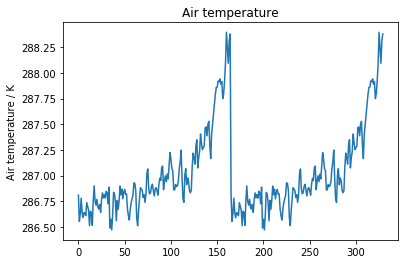

In [13]:

i = '/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_CanESM5_historical_r1i1p1f1_gn_area_avg.nc'
#i = '/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_E3SM-1-0_historical_r1i1p1f1_gr_area_avg.nc'

cube = load_n_squeeze(i)

qplt.plot(cube)
print(cube.data[-165:])


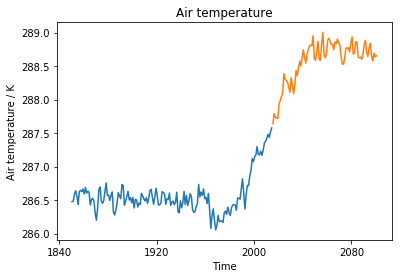

In [7]:
qplt.plot(ukesm_hist)
qplt.plot(ukesm_ssp119)

plt.show()

In [8]:
def load_n_squeeze(fn):
    return iris.util.squeeze(iris.load_cube(fn))

ukesm_ssp126 = load_n_squeeze(awdir+"tas_Amon_UKESM1-0-LL_ssp126_r1i1p1f2_gn_area_avg.nc")
ukesm_ssp245 = load_n_squeeze(awdir+"tas_Amon_UKESM1-0-LL_ssp245_r1i1p1f2_gn_area_avg.nc")
ukesm_ssp370 = load_n_squeeze(awdir+"tas_Amon_UKESM1-0-LL_ssp370_r1i1p1f2_gn_area_avg.nc")
ukesm_ssp434 = load_n_squeeze(awdir+"tas_Amon_UKESM1-0-LL_ssp434_r1i1p1f2_gn_area_avg.nc")
ukesm_ssp534 = load_n_squeeze(awdir+"tas_Amon_UKESM1-0-LL_ssp534-over_r1i1p1f2_gn_area_avg.nc")
ukesm_ssp584 = load_n_squeeze(awdir+"tas_Amon_UKESM1-0-LL_ssp585_r1i1p1f2_gn_area_avg.nc")

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_

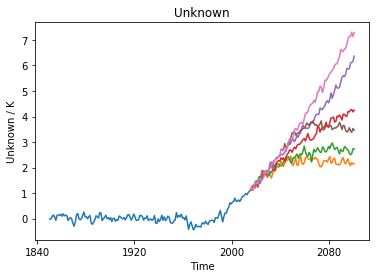

In [9]:
pit = 286.5

qplt.plot(ukesm_hist   - pit)
qplt.plot(ukesm_ssp119 - pit)
qplt.plot(ukesm_ssp126 - pit)
qplt.plot(ukesm_ssp245 - pit)
qplt.plot(ukesm_ssp370 - pit)
qplt.plot(ukesm_ssp534 - pit)
qplt.plot(ukesm_ssp584 - pit)

plt.show()

In [152]:
# Rich says our initial target should be the 1% runs. These are labelled 1pctCO2
import glob
import os

# This finds a list of  runs and pathlist
pctCO2_pathlist = glob.glob(awdir+'*1pctCO2*r1i1p1*')
#print(pctCO2_pathlist)

# Just the filenames
pctCO2_r1i1p1_filenames = [os.path.basename(x) for x in glob.glob(awdir+'*1pctCO2*r1i1p1*')]

#print(pctCO2_r1i1p1_filenames) 

# Find the unique model names by searching between text
import re
import numpy as np

import datetime
from iris.time import PartialDateTime

#text = 'gfgfdAAA1234ZZZuijjk'
#m = re.search('AAA(.+?)ZZZ', text)
#if m:
#    found = m.group(1)
#    print(found)
       
#for i in pctCO2_r1i1p1_filenames:
#    print(i)
    
#    m = re.search('Amon_(.+?)_1pctCO2', i)
#    if m:
#        found = m.group(1)
#        print(found)

startyear = 1850
endyear = 2015
outfile_data = 'test_data.txt'
outfile_models = 'test_models.txt'

for i in pctCO2_pathlist:
    print(i)
    
    years = range(startyear,endyear)
    out_ts = years
    
    dat = np.empty(len(years))
    dat[:] = -999
#   print(dat)
    
    # extract the model name
    m = re.search('Amon_(.+?)_1pctCO2', i)
    if m:
        modname = m.group(1)
        print(modname)     
        
    cube = load_n_squeeze(i)
#   time = cube.coord('time')
#    print(time)
    
# process the data, years in columns and models in rows? 
#    print(cube.data)
    
    dl = len(cube.data)
    print(dl)
    dat[0:dl] = cube.data
    
    out_ts = np.vstack((out_ts, dat))
    
np.savetxt(outfile_data, out_ts)
np.savetxt(outfile_models, pctCO2_pathlist, fmt = '%s')

# https://stackoverflow.com/questions/51860716/how-save-a-array-to-text-file-in-python
    
    


/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_MPI-ESM1-2-LR_1pctCO2_r1i1p1f1_gn_area_avg.nc
MPI-ESM1-2-LR


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


165
/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_CNRM-CM6-1-HR_1pctCO2_r1i1p1f2_gr_area_avg.nc
CNRM-CM6-1-HR


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


150
/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_CanESM5_1pctCO2_r1i1p1f1_gn_area_avg.nc
CanESM5


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


151
/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_INM-CM5-0_1pctCO2_r1i1p1f1_gr1_area_avg.nc
INM-CM5-0


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


113
/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_CESM2-WACCM-FV2_1pctCO2_r1i1p1f1_gn_area_avg.nc
CESM2-WACCM-FV2


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


150
/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_NorESM2-LM_1pctCO2_r1i1p1f1_gn_area_avg.nc
NorESM2-LM


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


150
/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_CNRM-ESM2-1_1pctCO2_r1i1p1f2_gr_area_avg.nc
CNRM-ESM2-1


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


150
/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_IPSL-CM6A-LR_1pctCO2_r1i1p1f1_gr_area_avg.nc
IPSL-CM6A-LR


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


150
/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_HadGEM3-GC31-LL_1pctCO2_r1i1p1f3_gn_area_avg.nc
HadGEM3-GC31-LL


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


150
/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_CESM2_1pctCO2_r1i1p1f1_gn_area_avg.nc
CESM2


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


150
/data/users/hadaw/cmip6/areaavg/tas/tas_Amon_MCM-UA-1-0_1pctCO2_r1i1p1f1_gn_area_avg.nc
MCM-UA-1-0
500


ValueError: could not broadcast input array from shape (500) into shape (165)